# <center> **Nodule classification - PULMONSIGTH** </center>


Donovan David Torres Vahos

Karen Tatiana Pimiento Martinez

Alvaro Steven Mejia Ortiz

# ***DETECCION DE CANCER PULMONAR***

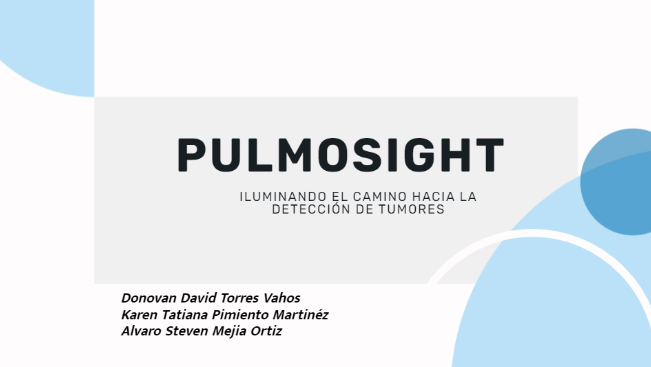

Para la realizacion de este PORYECTO FINAL recopilamos informacion del reto 2 de IA se centró en la clasificación de nódulos pulmonares utilizando diversas arquitecturas de redes neuronales profundas. Entre ellas se destacan las Redes Neuronales Convolucionales **(CNN)**, que fueron implementadas con capas específicas de convolución y pooling para extraer características.

 Además, se exploraron modelos como Autoencoders Denoising **(DAE)** para la extracción de características y Redes de Creencias Profundas **(DBN)** para comparar su rendimiento. Los experimentos incluyeron la evaluación con múltiples conjuntos de datos, desde imágenes originales hasta datos sintéticos generados con variabilidad geométrica. Este enfoque demostró la efectividad de las **CNN 3D y MCNN** para superar desafíos como la variabilidad en tamaño y forma de los nódulos. Más detalles pueden encontrarse en el artículo original: https://arxiv.org/pdf/1611.06651."

El Modelo 5 (ResNet50 con BatchNormalization) es el mejor modelo debido a su  precisión, recall y accuracy. La adición de Batch Normalization ha mejorado bastante la estabilidad del modelo y su capacidad para generalizar, lo que lo hace más robusto y confiable para aplicaciones médicas que requieren alta precisión en la clasificación de imágenes de nódulos pulmonares.

In [ ]:
#@title Importamos paquetes y descargar el dataset
!pip install --upgrade gdown --q
import os
import gc
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

!gdown https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ # Train data
!gdown https://drive.google.com/uc?id=1oLsKDoXMLKBzYEdH4mdIvDjJssHYXW2v # Train labels


Downloading...
From (original): https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ
From (redirected): https://drive.google.com/uc?id=18wuVYG6jVnAI0PJcJO4sJyZtDTs5FbpJ&confirm=t&uuid=6917ec5f-f655-48c2-b9b4-a73ea2032d2c
To: /content/nodules_classification_train_data.npy
100% 785M/785M [00:03<00:00, 238MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oLsKDoXMLKBzYEdH4mdIvDjJssHYXW2v
To: /content/nodules_classification_train_labels.npy
100% 24.1k/24.1k [00:00<00:00, 63.8MB/s]


In [ ]:
#@title # Cargamos el data set
from sklearn.model_selection import train_test_split
# Cargar los datos
X = np.load("/content/nodules_classification_train_data.npy")
y = np.load("/content/nodules_classification_train_labels.npy")

print(X.shape , y.shape)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=750, stratify=y, random_state=42)

print(X_train.shape,X_test.shape, y_train.shape)

(2994, 512, 512) (2994,)
(2244, 512, 512) (750, 512, 512) (2244,)


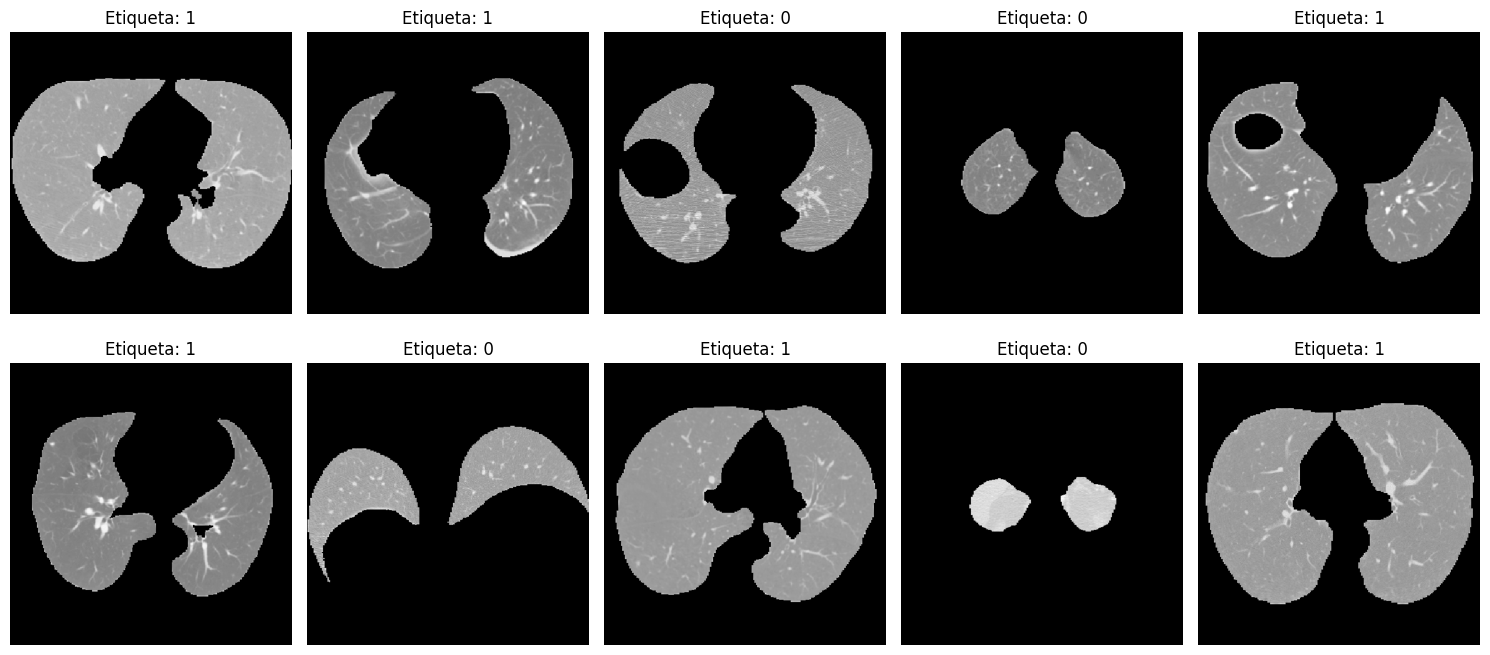

In [ ]:
#@title ## Imagenes
datos = tf.data.Dataset.from_tensor_slices((X, y))
import matplotlib.pyplot as plt

num_images_to_show = 10

plt.figure(figsize=(15, 7))
for i in range(num_images_to_show):
    plt.subplot(2, 5, i + 1)  # Organiza las imágenes en una cuadrícula de 2 filas y 5 columnas
    plt.imshow(X[i], cmap='gray')  # Ajusta cmap según el tipo de imágenes que tengas
    plt.title(f'Etiqueta: {y[i]}')  # Muestra la etiqueta correspondiente a la imagen
    plt.axis('off')  # Oculta los ejes
plt.tight_layout()
plt.show()


Etiqueta 0: Generalmente se utiliza para representar la clase negativa o la ausencia de la condición que estás investigando. En el caso de cáncer de pulmón, podría representar que el nódulo pulmonar no es canceroso (benigno).

Etiqueta 1: Representa la clase positiva o la presencia de la condición que estás investigando. En el contexto de cáncer de pulmón, podría representar que el nódulo pulmonar es canceroso (maligno).

**------------------------------1. MODELO ----------------------------------------**

Realizando una investigacion encontramos que las **Redes Neuronales Convolucionales (CNN)** es uno de los mas usados en este modelo se puede evidenciar que se utilizo técnicas para evitar el sobreajuste:



**Batch Normalization:**(Añadida después de las capas convolucionales para estabilizar y acelerar el entrenamiento

**Dropout:**(Añadida después de las capas densas para evitar el sobreajuste)

**Early Stopping:**( Implementada para detener el entrenamiento cuando la validación no mejora.)

**Optimización:** (Ajuste del optimizador Adam con una tasa de aprendizaje más baja para mejorar el rendimiento.)

y se hizo un **analisis de resultados** con el uso de classification_report y roc_auc_score para obtener métricas adicionales mediante graficas de perdida y precision

Dimensiones de X: (2994, 512, 512), Dimensiones de y: (2994,)
Dimensiones de X_train: (2244, 512, 512), Dimensiones de X_test: (750, 512, 512), Dimensiones de y_train: (2244,)
Dimensiones de X_train_resized: (2244, 64, 64, 1)
Dimensiones de X_test_resized: (750, 64, 64, 1)
Epoch 1/10
71/71 [==============================] - 6s 15ms/step - loss: 2.1877 - accuracy: 0.5597 - val_loss: 0.6806 - val_accuracy: 0.5907
Epoch 2/10
71/71 [==============================] - 1s 8ms/step - loss: 0.6502 - accuracy: 0.6114 - val_loss: 0.6718 - val_accuracy: 0.5947
Epoch 3/10
71/71 [==============================] - 1s 9ms/step - loss: 0.6051 - accuracy: 0.6560 - val_loss: 0.7118 - val_accuracy: 0.5973
Epoch 4/10
71/71 [==============================] - 1s 10ms/step - loss: 0.5570 - accuracy: 0.7063 - val_loss: 0.6913 - val_accuracy: 0.5800
Epoch 5/10
71/71 [==============================] - 1s 10ms/step - loss: 0.4930 - accuracy: 0.7451 - val_loss: 0.7370 - val_accuracy: 0.5747
Epoch 6/10
71/71 [=====

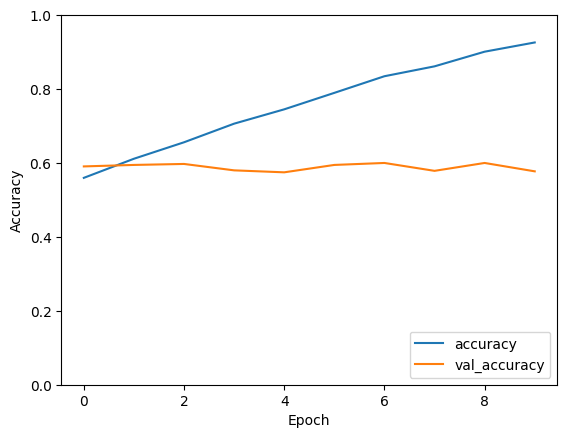

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#@title ## Implementar modelos para la tarea de clasificación (CNNs) con TensorFlow y Keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf

# Cargar los datos
X = np.load("/content/nodules_classification_train_data.npy")
y = np.load("/content/nodules_classification_train_labels.npy")

# Mostrar las dimensiones de los datos
print(f"Dimensiones de X: {X.shape}, Dimensiones de y: {y.shape}")

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=750, stratify=y, random_state=42)

# Mostrar las dimensiones de los datos divididos
print(f"Dimensiones de X_train: {X_train.shape}, Dimensiones de X_test: {X_test.shape}, Dimensiones de y_train: {y_train.shape}")

# Expandir dimensiones para tener 3 dimensiones antes de redimensionar
X_train_expanded = np.expand_dims(X_train, axis=-1)
X_test_expanded = np.expand_dims(X_test, axis=-1)

# Redimensionar las imágenes a 64x64
X_train_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_train_expanded])
X_test_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_test_expanded])

print(f"Dimensiones de X_train_resized: {X_train_resized.shape}")
print(f"Dimensiones de X_test_resized: {X_test_resized.shape}")

# Definir el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_resized, y_train, epochs=10,
                    validation_data=(X_test_resized, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Graficar los resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Guardar el modelo
model.save('nodules_classification_model.h5')


**------------------------------2. MODELO ----------------------------------------**

Redes de Creencias Profundas (DBN) y Redes Neuronales Convolucionales (CNN): Se utilizaron para comparar su rendimiento con los métodos convencionales basados en características geométricas y fractales, se implemento lo mismo del primer modelo pero con una diferencia de:

En este modelo, se combinan Redes de Creencias Profundas (DBN) y Redes Neuronales Convolucionales (CNN) para aprovechar el preentrenamiento de la DBN. Esto ayuda a extraer mejores características de los datos antes de usarlas en la CNN, lo que puede mejorar el rendimiento del modelo.

Este enfoque es diferente del primer modelo, que utilizó una CNN directamente con técnicas de regularización avanzadas como Batch Normalization, Dropout y Early Stopping para evitar el sobreajuste.

Dimensiones de X: (2994, 512, 512), Dimensiones de y: (2994,)
Dimensiones de X_train: (2244, 512, 512), Dimensiones de X_test: (750, 512, 512), Dimensiones de y_train: (2244,)
Dimensiones de X_train_resized: (2244, 64, 64, 1)
Dimensiones de X_test_resized: (750, 64, 64, 1)
Dimensiones de X_train_dbn_features: (2244, 128)
Dimensiones de X_test_dbn_features: (750, 128)
Epoch 1/10
71/71 [==============================] - 2s 7ms/step - loss: 0.6922 - accuracy: 0.5281 - val_loss: 0.6793 - val_accuracy: 0.5947
Epoch 2/10
71/71 [==============================] - 0s 7ms/step - loss: 0.6821 - accuracy: 0.5633 - val_loss: 0.6712 - val_accuracy: 0.5960
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 0.6762 - accuracy: 0.5726 - val_loss: 0.6782 - val_accuracy: 0.5613
Epoch 4/10
71/71 [==============================] - 0s 7ms/step - loss: 0.6691 - accuracy: 0.5820 - val_loss: 0.6606 - val_accuracy: 0.5947
Epoch 5/10
71/71 [==============================] - 1s 9ms/step - loss

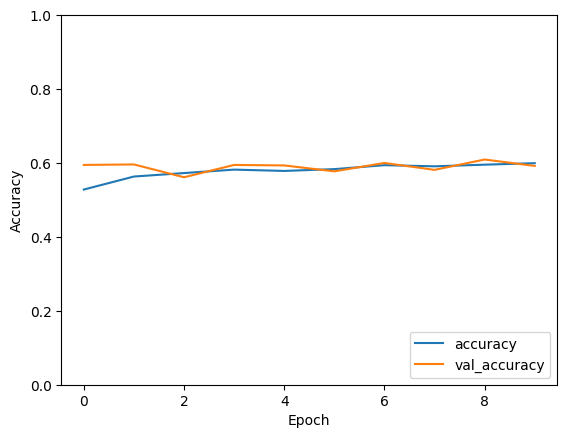

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#@title ## Implementar Redes de Creencias Profundas (DBN) y Redes Neuronales Convolucionales (CNN)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
import tensorflow as tf

# Cargar los datos
X = np.load("/content/nodules_classification_train_data.npy")
y = np.load("/content/nodules_classification_train_labels.npy")

# Mostrar las dimensiones de los datos
print(f"Dimensiones de X: {X.shape}, Dimensiones de y: {y.shape}")

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=750, stratify=y, random_state=42)

# Mostrar las dimensiones de los datos divididos
print(f"Dimensiones de X_train: {X_train.shape}, Dimensiones de X_test: {X_test.shape}, Dimensiones de y_train: {y_train.shape}")

# Expandir dimensiones para tener 3 dimensiones antes de redimensionar
X_train_expanded = np.expand_dims(X_train, axis=-1)
X_test_expanded = np.expand_dims(X_test, axis=-1)

# Redimensionar las imágenes a 64x64
X_train_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_train_expanded])
X_test_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_test_expanded])

print(f"Dimensiones de X_train_resized: {X_train_resized.shape}")
print(f"Dimensiones de X_test_resized: {X_test_resized.shape}")

# Preprocesamiento para DBN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resized.reshape(-1, 64*64))
X_test_scaled = scaler.transform(X_test_resized.reshape(-1, 64*64))

# Definir la DBN
rbm1 = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=15, random_state=42)
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=15, random_state=42)

# Encadenar las RBMs
dbn = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2)])

# Entrenar la DBN
dbn.fit(X_train_scaled)

# Extraer características de la DBN
X_train_dbn_features = dbn.transform(X_train_scaled)
X_test_dbn_features = dbn.transform(X_test_scaled)

# Mostrar las dimensiones de las características extraídas por la DBN
print(f"Dimensiones de X_train_dbn_features: {X_train_dbn_features.shape}")
print(f"Dimensiones de X_test_dbn_features: {X_test_dbn_features.shape}")

# Definir el modelo
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_dbn_features.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_dbn_features, y_train, epochs=10,
                    validation_data=(X_test_dbn_features, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test_dbn_features, y_test)
print(f'Test accuracy: {test_acc}')

# Graficar los resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Guardar el modelo
model.save('nodules_classification_model_dbn_dense.h5')


**------------------------------3. MODELO ----------------------------------------**

Redes Neuronales Convolucionales Multiescala (MCNN): Introducidas para clasificar nódulos con variabilidad en su tamaño, superando los descriptores texturales de referencia.

En este modelo cambiamos un poco las cosas:

Se cargan los datos de imágenes de nódulos y se redimensionan a 64x64 píxeles utilizando TensorFlow. Se utiliza ImageDataGenerator para generar lotes de imágenes con aumentos de datos como rotación, desplazamiento, zoom, volteo horizontal, brillo y cizallamiento. Definición del Modelo MCNN:

Se define un modelo MCNN que utiliza tres escalas diferentes de convoluciones y max pooling para capturar características a diferentes resoluciones espaciales.

Capas Adicionales y Regularización como capas adicionales de convolución y capas densas y se aplica regularización L2 en las capas densas y dropout para mitigar el sobreajuste y mejorar la generalización del modelo.

Se utilizan técnicas de early stopping y model checkpointing durante el entrenamiento para evitar el sobreajuste y guardar el mejor modelo basado en la pérdida en validación.

Epoch 1/20
150/150 [==============================] - 7s 26ms/step - loss: 0.7981 - accuracy: 0.5071 - val_loss: 0.7796 - val_accuracy: 0.5251
Epoch 2/20
150/150 [==============================] - 5s 31ms/step - loss: 0.7669 - accuracy: 0.5342 - val_loss: 0.7588 - val_accuracy: 0.5368
Epoch 3/20
150/150 [==============================] - 5s 33ms/step - loss: 0.7467 - accuracy: 0.5593 - val_loss: 0.7485 - val_accuracy: 0.5084
Epoch 4/20
150/150 [==============================] - 4s 23ms/step - loss: 0.7357 - accuracy: 0.5630 - val_loss: 0.7369 - val_accuracy: 0.5268
Epoch 5/20
150/150 [==============================] - 4s 23ms/step - loss: 0.7204 - accuracy: 0.5872 - val_loss: 0.7269 - val_accuracy: 0.5853
Epoch 6/20
150/150 [==============================] - 5s 31ms/step - loss: 0.7189 - accuracy: 0.5780 - val_loss: 0.7261 - val_accuracy: 0.5585
Epoch 7/20
150/150 [==============================] - 3s 23ms/step - loss: 0.7169 - accuracy: 0.5851 - val_loss: 0.7219 - val_accuracy: 0.5485

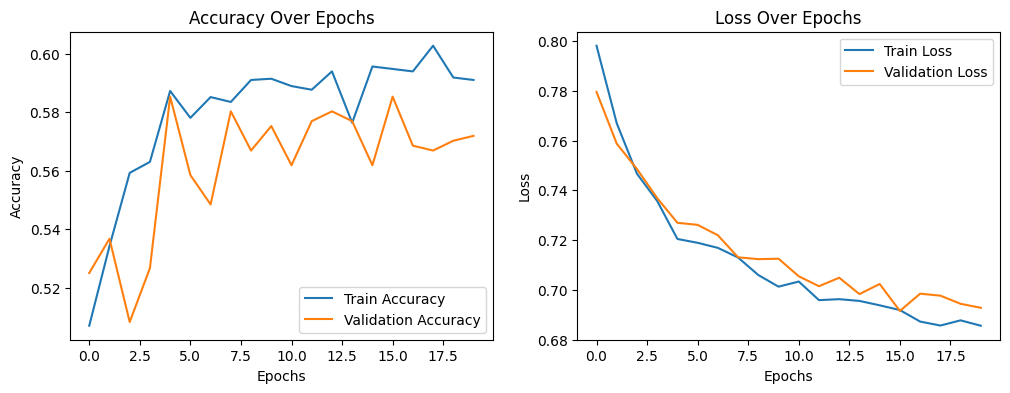

In [ ]:

#@title ## Implementar Redes Neuronales Convolucionales Multiescala (MCNN)

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Cargar datos de entrenamiento y etiquetas
X = np.load("/content/nodules_classification_train_data.npy")
y = np.load("/content/nodules_classification_train_labels.npy")

# Asumiendo que X tiene la forma (num_samples, height, width)
# Agregar la dimensión de canal si es necesario (en este caso, sería 1 para escala de grises)
if X.ndim == 3:
    X = np.expand_dims(X, axis=-1)

# Redimensionar las imágenes para reducir el uso de memoria
X = tf.image.resize(X, [64, 64])

# Definir un generador de datos para redimensionar imágenes por lotes con aumento de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.2
)

train_generator = datagen.flow(X, y, batch_size=16, subset='training')
validation_generator = datagen.flow(X, y, batch_size=16, subset='validation')

# Definir modelo de Redes Neuronales Convolucionales Multiescala (MCNN)
input_shape = (64, 64, 1)  # Ajustar la entrada a las imágenes redimensionadas
inputs = Input(shape=input_shape, name="input_layer")

# Escala 1: Conv2D + MaxPooling2D
scale1 = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same', name="scale1_conv1")(inputs)
scale1 = MaxPooling2D(pool_size=(2, 2), name="scale1_pool1")(scale1)
scale1 = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', name="scale1_conv2")(scale1)
scale1 = MaxPooling2D(pool_size=(2, 2), name="scale1_pool2")(scale1)

# Escala 2: Conv2D con filtro más grande + MaxPooling2D
scale2 = Conv2D(8, kernel_size=(5, 5), activation='relu', padding='same', name="scale2_conv1")(inputs)
scale2 = MaxPooling2D(pool_size=(2, 2), name="scale2_pool1")(scale2)
scale2 = Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same', name="scale2_conv2")(scale2)
scale2 = MaxPooling2D(pool_size=(2, 2), name="scale2_pool2")(scale2)

# Escala 3: Conv2D con filtro aún más grande + MaxPooling2D
scale3 = Conv2D(16, kernel_size=(7, 7), activation='relu', padding='same', name="scale3_conv1")(inputs)
scale3 = MaxPooling2D(pool_size=(2, 2), name="scale3_pool1")(scale3)
scale3 = Conv2D(32, kernel_size=(7, 7), activation='relu', padding='same', name="scale3_conv2")(scale3)
scale3 = MaxPooling2D(pool_size=(2, 2), name="scale3_pool2")(scale3)

# Concatenar características de todas las escalas
concat = Concatenate(name="concat")([scale1, scale2, scale3])

# Capas adicionales para procesamiento conjunto de características
conv_out = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name="final_conv")(concat)
conv_out = MaxPooling2D(pool_size=(2, 2), name="final_pool")(conv_out)
conv_out = Flatten(name="flatten")(conv_out)
conv_out = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), name="dense1")(conv_out)
conv_out = Dropout(0.5, name="dropout")(conv_out)
outputs = Dense(1, activation='sigmoid', name="output_layer")(conv_out)

# Modelo final
model = Model(inputs=inputs, outputs=outputs, name="MCNN_model")

# Compilar el modelo con un optimizador que tenga una tasa de aprendizaje menor
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Definir callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Entrenar el modelo utilizando el generador de datos
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping, model_checkpoint])

# Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()


**------------------------------4. MODELO ----------------------------------------**

 Modelo Resnet50 Preenetenado:Es una red neuronal profunda con 50 capas que se utilizó en este proyecto debido a su capacidad para manejar redes profundas sin degradar el rendimiento. Su arquitectura avanzada permite capturar características complejas en las imágenes

 Las capas adiconales

* Se agrega una capa **Flatten** para aplanar la salida de ResNet50.
* Se añaden capas **Dense** para aumentar la capacidad de aprendizaje con activación relu.
* Se incluye una capa **Dropout** para regularización y evitar el sobreajuste.
* La capa de salida utiliza activación **sigmoid** para problemas de clasificación binaria.

(2994, 512, 512) (2994,)
(2395, 512, 512) (599, 512, 512) (2395,)
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/50
75/75 [==============================] - ETA: 0s - loss: 3.9208 - accuracy: 0.5645
Epoch 1: val_accuracy improved from -inf to 0.60768, saving model to resnet50_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 350s 5s/step - loss: 3.9208 - accuracy: 0.5645 - val_loss: 0.6329 - val_accuracy: 0.6077
Epoch 2/50
75/75 [==============================] - ETA: 0s - loss: 0.6495 - accuracy: 0.6184
Epoch 2: val_accuracy improved from 0.60768 to 0.62771, saving model to resnet50_model.h5
75/75 [==============================] - 358s 5s/step - loss: 0.6495 - accuracy: 0.6184 - val_loss: 0.6287 - val_accuracy: 0.6277
Epoch 3/50
75/75 [==============================] - ETA: 0s - loss: 0.6094 - accuracy: 0.6572
Epoch 3: val_accuracy did not improve from 0.62771
75/75 [==============================] - 335s 4s/step - loss: 0.6094 - accuracy: 0.6572 - val_loss: 0.6654 - val_accuracy: 0.6127
Epoch 4/50
75/75 [==============================] - ETA: 0s - loss: 0.6000 - accuracy: 0.6760
Epoch 4: val_accuracy did not improve from 0.62771
75/75 [==============================] - 339s 5s/step - loss: 0.6000 - accuracy: 0.6760 - val_loss: 0.6269 - val_accuracy: 0.6277
Epoch 

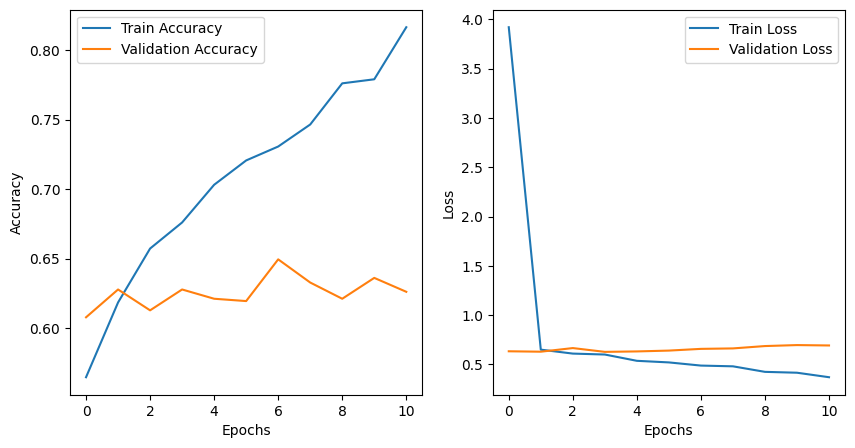

In [ ]:
#@title ## Implementar Modelo Resnet50
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

# Callback para detener el entrenamiento después de una hora
class TimeStopping(Callback):
    def __init__(self, seconds=None, verbose=0):
        super(TimeStopping, self).__init__()
        self.start_time = None
        self.seconds = seconds
        self.verbose = verbose

    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_batch_end(self, batch, logs=None):
        elapsed_time = time.time() - self.start_time
        if elapsed_time >= self.seconds:
            self.model.stop_training = True
            if self.verbose > 0:
                print(f'\nTraining stopped after {elapsed_time:.2f} seconds.')

# Cargar los datos
X = np.load("/content/nodules_classification_train_data.npy")
y = np.load("/content/nodules_classification_train_labels.npy")

print(X.shape , y.shape)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape,X_test.shape, y_train.shape)

# Definir la entrada con una sola canal (escala de grises)
input_shape = (512, 512, 1)
input_tensor = Input(shape=input_shape)

# Convertir 1 canal a 3 canales replicando el canal
x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(input_tensor)

# Cargar el modelo ResNet50 preentrenado sin las capas superiores
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=x)

# Congelar las capas del modelo base para evitar su reentrenamiento
for layer in base_model.layers:
    layer.trainable = False

# Crear un modelo nuevo basado en el ResNet50
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)  # Aumentar las neuronas de esta capa
x = Dropout(0.5)(x)  # Agregar dropout para reducir sobreajuste
x = Dense(1, activation='sigmoid')(x)  # Para clasificación binaria

# Crear el modelo final
model = Model(inputs=input_tensor, outputs=x)

# Compilar el modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpointer = ModelCheckpoint('resnet50_model.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
time_stopping = TimeStopping(seconds=3600, verbose=1)  # 3600 segundos = 1 hora

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,  # Usar y_train y y_test directamente
    epochs=50,  # Puedes ajustar el número de épocas
    validation_data=(X_test, y_test),
    batch_size=32,  # Aumentar el tamaño del lote
    callbacks=[early_stopping, checkpointer, time_stopping]
)

# Mostrar historia del entrenamiento
def show_history(history):
    fig = plt.figure(figsize=(10,5))

    # Accuracy
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['accuracy'], label='Train Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

    # Loss
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.legend()
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')

show_history(history)


In [ ]:
#@title ###Evaluar el rendimiento del modelo ResNet50
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
# Cargar el modelo entrenado
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model("resnet50_model.h5")

# Evaluar el modelo cargado en el conjunto de prueba
test_loss, test_accuracy = loaded_model.evaluate(X_train, y_train)

# Imprimir un resumen del rendimiento del modelo
print("Resumen del rendimiento del modelo:")
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)


75/75 [==============================] - 213s 3s/step - loss: 0.3743 - accuracy: 0.8685
Resumen del rendimiento del modelo:
Pérdida en el conjunto de prueba: 0.37433287501335144
Precisión en el conjunto de prueba: 0.8684759736061096


In [ ]:
#@title ###Calcular métricas de predicciones del modelo
# Calcular las predicciones del modelo en el conjunto de prueba
y_pred = loaded_model.predict(X_train)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades en etiquetas binarias (0 o 1)

# Transformar las etiquetas a una sola columna (si es necesario)
y_true_classes = y_train.reshape(-1)  # Asegurarse de que y_train sea un array unidimensional

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular la precisión, recall y accuracy
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

print("Precisión:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

75/75 [==============================] - 212s 3s/step
Matriz de confusión:
[[1108   89]
 [ 226  972]]
Precisión: 0.9161168708765316
Recall: 0.8113522537562604
Accuracy: 0.8684759916492694


**--------------------------------------------------5. MODELO ----------------------------------------------**

EL MEJOR

 Modelo **Resnet50 Preenetenado**: Se implemento el mismo modelo 4, pero esta vez agregando Batch Normalization, con el fin de optimizar el modelo y ver si se da una mejoria

**Batch Normalization (BN):**

En el Modelo 4, no se utilizó Batch Normalization. Esto significa que las activaciones en cada capa oculta pueden variar durante el entrenamiento debido a la inicialización de los pesos y a la propagación hacia atrás, lo que puede hacer que el entrenamiento sea menos estable y requiera ajustes cuidadosos del hiperparámetro de la tasa de aprendizaje.


Mientras que en el **Modelo 5**, se incorporó Batch Normalization después de la capa de Flatten. Batch Normalization normaliza las activaciones de cada capa al asegurar que tengan una media cercana a cero y una desviación estándar cercana a uno, lo que **estabiliza el proceso de entrenamiento y acelera la convergencia**. Esto puede mejorar la precisión del modelo y permitir un entrenamiento más rápido y robusto.

 Esto se debe a que las capas Batch Normalization ayudan a reducir el riesgo de sobreajuste al regularizar el modelo durante el entrenamiento, lo que puede resultar en una mejor capacidad de generalización y mejores resultados en el conjunto de validación o prueba.


(2994, 512, 512) (2994,)
(2395, 512, 512) (599, 512, 512) (2395,)
Epoch 1/50
75/75 [==============================] - ETA: 0s - loss: 7.2566 - accuracy: 0.5620
Epoch 1: val_accuracy improved from -inf to 0.56594, saving model to resnet50_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 380s 5s/step - loss: 7.2566 - accuracy: 0.5620 - val_loss: 11.0123 - val_accuracy: 0.5659
Epoch 2/50
75/75 [==============================] - ETA: 0s - loss: 4.0684 - accuracy: 0.7524
Epoch 2: val_accuracy improved from 0.56594 to 0.57429, saving model to resnet50_model.h5
75/75 [==============================] - 351s 5s/step - loss: 4.0684 - accuracy: 0.7524 - val_loss: 7.5050 - val_accuracy: 0.5743
Epoch 3/50
75/75 [==============================] - ETA: 0s - loss: 2.2800 - accuracy: 0.8217
Epoch 3: val_accuracy improved from 0.57429 to 0.63439, saving model to resnet50_model.h5
75/75 [==============================] - 343s 5s/step - loss: 2.2800 - accuracy: 0.8217 - val_loss: 6.5413 - val_accuracy: 0.6344
Epoch 4/50
75/75 [==============================] - ETA: 0s - loss: 1.6156 - accuracy: 0.8630
Epoch 4: val_accuracy did not improve from 0.63439
75/75 [==============================] - 334s 4s/step - loss: 1.6156 - accuracy: 0.8630 - val_lo

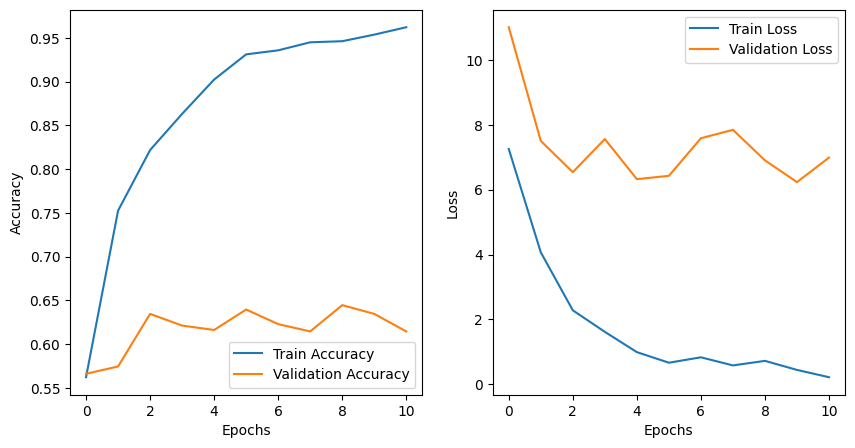

In [ ]:
#@title ## Implementar Modelo Resnet50 con BatchNormalization
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Callback para detener el entrenamiento después de una hora
class TimeStopping(Callback):
    def __init__(self, seconds=None, verbose=0):
        super(TimeStopping, self).__init__()
        self.start_time = None
        self.seconds = seconds
        self.verbose = verbose

    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_batch_end(self, batch, logs=None):
        elapsed_time = time.time() - self.start_time
        if elapsed_time >= self.seconds:
            self.model.stop_training = True
            if self.verbose > 0:
                print(f'\nTraining stopped after {elapsed_time:.2f} seconds.')

# Cargar los datos
X = np.load("/content/nodules_classification_train_data.npy")
y = np.load("/content/nodules_classification_train_labels.npy")

print(X.shape , y.shape)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape,X_test.shape, y_train.shape)

# Definir la entrada con una sola canal (escala de grises)
input_shape = (512, 512, 1)
input_tensor = Input(shape=input_shape)

# Convertir 1 canal a 3 canales replicando el canal
x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(input_tensor)

# Cargar el modelo ResNet50 preentrenado sin las capas superiores
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=x)

# Congelar las capas del modelo base para evitar su reentrenamiento
for layer in base_model.layers:
    layer.trainable = False

# Crear un modelo nuevo basado en el ResNet50
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)  # Add batch normalization
x = Dense(512, activation='relu')(x)  # Aumentar las neuronas de esta capa
x = Dropout(0.5)(x)  # Agregar dropout para reducir sobreajuste
x = Dense(1, activation='sigmoid')(x)  # Para clasificación binaria

# Crear el modelo final
model = Model(inputs=input_tensor, outputs=x)

# Compilar el modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpointer = ModelCheckpoint('resnet50_model.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
time_stopping = TimeStopping(seconds=3600, verbose=1)  # 3600 segundos = 1 hora

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,  # Usar y_train y y_test directamente sin one-hot encoding
    epochs=50,  # Puedes ajustar el número de épocas
    validation_data=(X_test, y_test),
    batch_size=32,  # Aumentar el tamaño del lote
    callbacks=[early_stopping, checkpointer, time_stopping]
)

# Mostrar historia del entrenamiento
def show_history(history):
    fig = plt.figure(figsize=(10,5))

    # Accuracy
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['accuracy'], label='Train Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

    # Loss
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.legend()
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')

show_history(history)

In [ ]:
#@title ###Evaluar el rendimiento del modelo ResNet con Batch Normalization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
# Cargar el modelo entrenado
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model("resnet50_model.h5")

# Evaluar el modelo cargado en el conjunto de prueba
test_loss, test_accuracy = loaded_model.evaluate(X_train, y_train)

# Imprimir un resumen del rendimiento del modelo
print("Resumen del rendimiento del modelo:")
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)

75/75 [==============================] - 217s 3s/step - loss: 0.1207 - accuracy: 0.9866
Resumen del rendimiento del modelo:
Pérdida en el conjunto de prueba: 0.12072049081325531
Precisión en el conjunto de prueba: 0.9866388440132141


In [ ]:
#@title ###Calcular Métricas para el modelo
# Calcular las predicciones del modelo en el conjunto de prueba
y_pred = loaded_model.predict(X_train)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades en etiquetas binarias (0 o 1)

# Transformar las etiquetas a una sola columna (si es necesario)
y_true_classes = y_train.reshape(-1)  # Asegurarse de que y_train sea un array unidimensional

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular la precisión, recall y accuracy
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

print("Precisión:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

75/75 [==============================] - 215s 3s/step
Matriz de confusión:
[[1186   11]
 [  21 1177]]
Precisión: 0.9907407407407407
Recall: 0.9824707846410684
Accuracy: 0.9866388308977035
